## Import libraries and load data

In [88]:
# Import common Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("data/book_covers_dataset_with_goodreads.csv")

# Display the first few rows of the dataset
df.head()

,Title,Author,Publisher,Genre,Price,Promoted,Dominant_color,Cover_type,Visual_style,Title_word_count,Author_name_prominent,Award_recognition,Page_count,Estimated_reading_time_hours,Rating,First_published_date
0,1984,George Orwell,Plume,"Classics, Fiction",10.70,1,black,paperback,illustration,1,1,0,368,8,4.20,08/06/1949
1,A Court of Thorns and Roses,Sarah J. Maas,Bloomsbury Publishing,"Fantasy, Young Adult",9.50,0,red,paperback,illustration,6,0,1,419,9,4.17,05/05/2015
2,A Palace Near the Wing,Ai Jiang,Titan Books,"Fantasy, Novella",17.05,0,blue,hardcover,illustration,5,1,1,192,4,3.35,15/04/2025
3,All About Love,Bell Hooks,William Morrow,"Nonfiction, Feminism",15.10,0,red,paperback,typographic,3,1,1,240,5,4.03,22/12/1999
4,Atomic Habits,James Clear,Avery,"Nonfiction, Self Help",19.15,1,white,paperback,typographic,2,0,1,319,7,4.34,18/10/2018


## Understand the data

In [89]:
# Check the shape (rows, columns)
df.shape

(80, 16)

In [90]:
# Check column names
df.columns

Index(['Title', 'Author', 'Publisher', 'Genre', 'Price', 'Promoted',
       'Dominant_color', 'Cover_type', 'Visual_style', 'Title_word_count',
       'Author_name_prominent', 'Award_recognition', 'Page_count',
       'Estimated_reading_time_hours', 'Rating', 'First_published_date'],
      dtype='object')

In [91]:
# Get data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Title                         80 non-null     object 
 1   Author                        80 non-null     object 
 2   Publisher                     80 non-null     object 
 3   Genre                         80 non-null     object 
 4   Price                         80 non-null     float64
 5   Promoted                      80 non-null     int64  
 6   Dominant_color                80 non-null     object 
 7   Cover_type                    80 non-null     object 
 8   Visual_style                  80 non-null     object 
 9   Title_word_count              80 non-null     int64  
 10  Author_name_prominent         80 non-null     int64  
 11  Award_recognition             80 non-null     int64  
 12  Page_count                    80 non-null     int64  
 13  Estimat

In [92]:
# Summary statistics for numerical features (some columns are binary)
df.describe()

,Price,Promoted,Title_word_count,Author_name_prominent,Award_recognition,Page_count,Estimated_reading_time_hours,Rating
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,16.798375,0.450000,3.07500,0.425000,0.625000,366.900000,7.662500,4.012625
std,5.228163,0.500633,1.71202,0.497462,0.487177,172.132904,3.610616,0.315950
min,9.500000,0.000000,1.00000,0.000000,0.000000,32.000000,1.000000,3.190000
25%,12.687500,0.000000,2.00000,0.000000,0.000000,256.000000,5.000000,3.777500
50%,15.200000,0.000000,3.00000,0.000000,1.000000,366.000000,8.000000,3.985000
75%,19.825000,1.000000,4.00000,1.000000,1.000000,443.750000,9.000000,4.230000
max,35.500000,1.000000,8.00000,1.000000,1.000000,1344.000000,28.000000,4.630000


In [93]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

## Clean and normalize the data

In [94]:
# Normalize column names: strip spaces, convert to lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip extra whitespace from string values only (clean text columns)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [95]:
# Create a simplified genre category function based on keyword logic
def simplify_genre(genre_string):
    if pd.isnull(genre_string):
        return 'Other'
    genre_string = genre_string.lower()

    if 'classics' in genre_string:
        return 'Classics'
    elif 'fantasy' in genre_string or 'romantasy' in genre_string or 'dragons' in genre_string:
        return 'Fantasy'
    elif 'romance' in genre_string or 'love' in genre_string or 'contemporary romance' in genre_string:
        return 'Romance'
    elif ('nonfiction' in genre_string or 'memoir' in genre_string or 
          'biography' in genre_string or 'philosophy' in genre_string or 
          'self help' in genre_string or 'art' in genre_string):
        return 'Nonfiction'
    elif 'thriller' in genre_string or 'mystery' in genre_string:
        return 'Thriller'
    elif 'science fiction' in genre_string or 'sci-fi' in genre_string:
        return 'Science Fiction'
    elif 'contemporary' in genre_string or 'literary fiction' in genre_string:
        return 'Contemporary'
    else:
        return 'Other'

In [96]:
# Get unique genres and preview how they are classified
unique_genres = df['genre'].drop_duplicates()
genre_preview = pd.DataFrame({'genre': unique_genres})
genre_preview['predicted_genre'] = genre_preview['genre'].apply(simplify_genre)
genre_preview

,genre,predicted_genre
0,"Classics, Fiction",Classics
1,"Fantasy, Young Adult",Fantasy
2,"Fantasy, Novella",Fantasy
3,"Nonfiction, Feminism",Nonfiction
4,"Nonfiction, Self Help",Nonfiction
5,"Fantasy, Historical Fiction",Fantasy
6,"Fiction, Contemporary",Contemporary
7,"Romance, Second Chance",Romance
8,"Romance, Sports",Romance
9,"Horror, Fantasy",Fantasy


In [137]:
# Apply the genre classification function to a new column
df['main_genre'] = df['genre'].apply(simplify_genre)

# Save the updated DataFrame with new column to a new CSV file
df.to_csv('book_covers_goodreads_after_eda.csv', index=False)

# Display the first few rows of the dataset
df.head()

,title,author,publisher,genre,price,promoted,dominant_color,cover_type,visual_style,title_word_count,author_name_prominent,award_recognition,page_count,estimated_reading_time_hours,rating,first_published_date,main_genre,published_year
0,1984,George Orwell,Plume,"Classics, Fiction",10.70,True,black,paperback,illustration,1,True,False,368,8,4.20,1949-06-08,Classics,1949
1,A Court of Thorns and Roses,Sarah J. Maas,Bloomsbury Publishing,"Fantasy, Young Adult",9.50,False,red,paperback,illustration,6,False,True,419,9,4.17,2015-05-05,Fantasy,2015
2,A Palace Near the Wing,Ai Jiang,Titan Books,"Fantasy, Novella",17.05,False,blue,hardcover,illustration,5,True,True,192,4,3.35,2025-04-15,Fantasy,2025
3,All About Love,Bell Hooks,William Morrow,"Nonfiction, Feminism",15.10,False,red,paperback,typographic,3,True,True,240,5,4.03,1999-12-22,Nonfiction,1999
4,Atomic Habits,James Clear,Avery,"Nonfiction, Self Help",19.15,True,white,paperback,typographic,2,False,True,319,7,4.34,2018-10-18,Nonfiction,2018


In [98]:
# Convert first_published_date to datetime (day first, exact format)
df['first_published_date'] = pd.to_datetime(
    df['first_published_date'],
    format='%d/%m/%Y',
    errors='raise'
)

# Convert binary columns to boolean type
df['promoted'] = df['promoted'].astype(bool)
df['author_name_prominent'] = df['author_name_prominent'].astype(bool)
df['award_recognition'] = df['award_recognition'].astype(bool)

# Convert categorical variables to category type
categorical_columns = ['cover_type', 'visual_style', 'dominant_color', 'genre', 'main_genre']
df[categorical_columns] = df[categorical_columns].astype('category')

# Check if all dates were parsed correctly
print("Missing dates:", df['first_published_date'].isnull().sum())  # should be 0

# Confirm data types
df.info()

Missing dates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         80 non-null     object        
 1   author                        80 non-null     object        
 2   publisher                     80 non-null     object        
 3   genre                         80 non-null     category      
 4   price                         80 non-null     float64       
 5   promoted                      80 non-null     bool          
 6   dominant_color                80 non-null     category      
 7   cover_type                    80 non-null     category      
 8   visual_style                  80 non-null     category      
 9   title_word_count              80 non-null     int64         
 10  author_name_prominent         80 non-null     bool          
 11  award_recognition

## Univariate Analysis

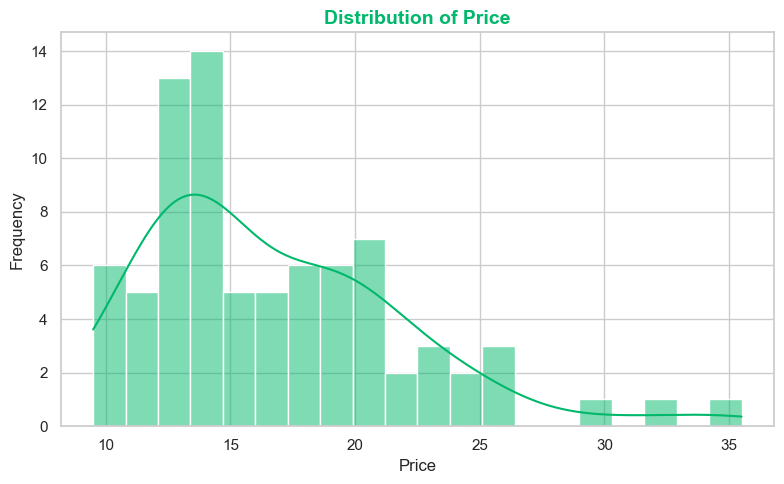

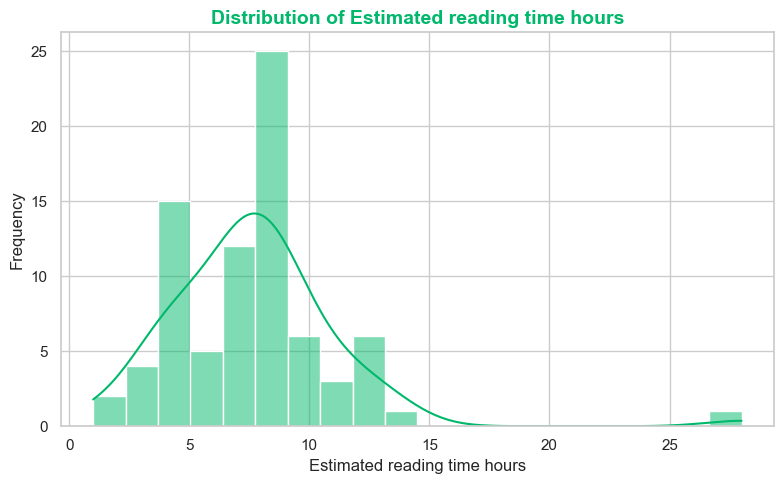

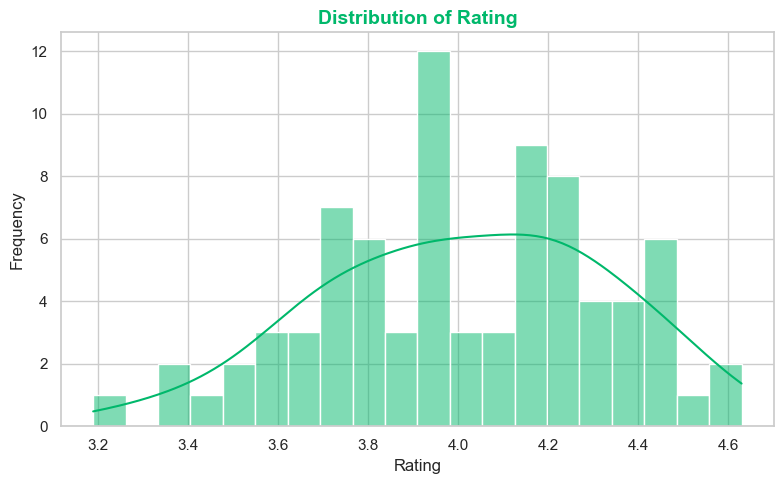

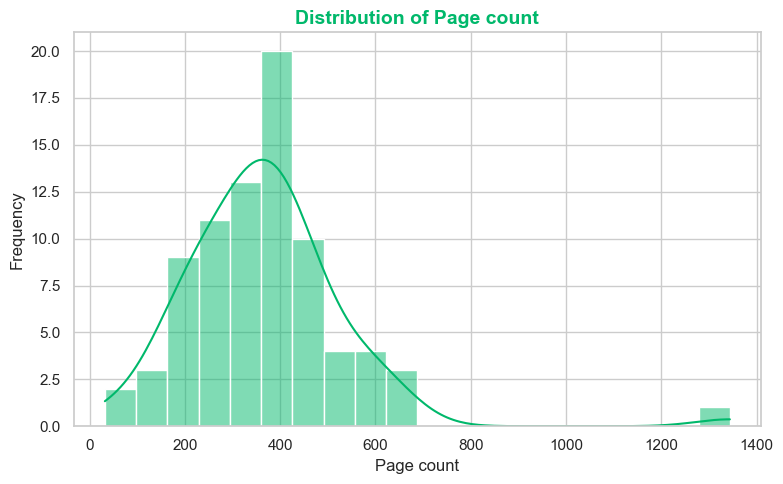

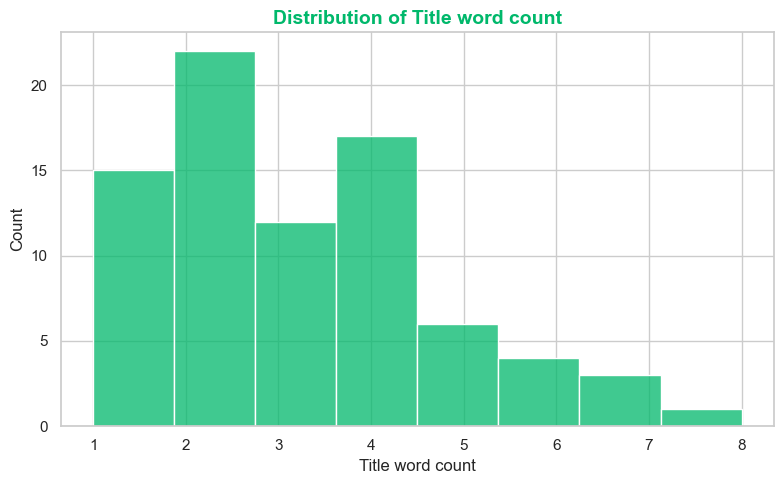

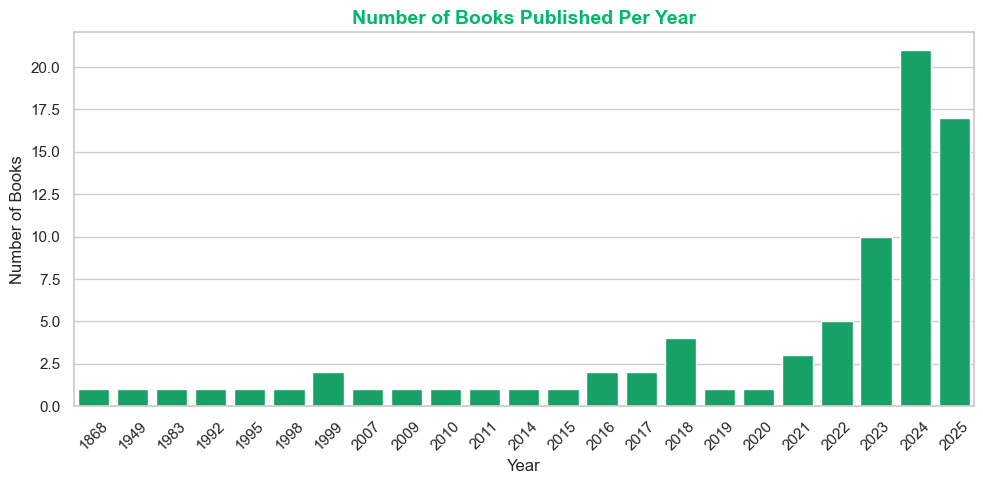

In [107]:
# Univariate Analysis for Numerical Variables

# Set consistent visual style and green color
sns.set(style='whitegrid')
hist_color = '#00B86B'

# === CONTINUOUS VARIABLES ===
# These can have a KDE (density curve)
continuous_columns = ['price', 'estimated_reading_time_hours', 'rating', 'page_count']

for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=20, color=hist_color)
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}', fontsize=14, color=hist_color, weight='bold')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# === DISCRETE VARIABLES ===
# These are better shown without KDE
discrete_columns = ['title_word_count']

for col in discrete_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=False, bins=len(df[col].unique()), color=hist_color)
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}', fontsize=14, color=hist_color, weight='bold')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# === DATE VARIABLE ===
# Extract year from the datetime column
df['published_year'] = df['first_published_date'].dt.year

# Plot number of books published per year
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='published_year',
    order=df['published_year'].value_counts().sort_index().index,
    color=hist_color
)
plt.title('Number of Books Published Per Year', fontsize=14, color=hist_color, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Insights from Numerical Variables
The distributions of numerical features reveal several interesting patterns about the bestselling books in the dataset:

Price: Most books are priced between €10 and €20, suggesting an affordable range for mass-market appeal. Only a few titles exceed €30, likely special editions or hardcover formats.

Page Count: The typical book has between 300 and 500 pages. There's one noticeable outlier with over 1300 pages, which may affect the mean.

Estimated Reading Time (hours):  Reading times mostly cluster between 4 and 12 hours, with a long tail for longer reads.

Rating: Goodreads ratings are concentrated between 3.5 and 4.5, showing that all books perform relatively well on Goodreads. Since these books are already highlighted in stores, poor-rated books are naturally filtered out.

Title Word Count: Most titles are short and memorable (2 to 4 words), reflecting a trend in marketing clarity and shelf visibility. Long titles are less common.

First Published Date: There's a visible surge in books from 2022 onward, including upcoming 2024–2025 titles. This supports the idea that the dataset reflects recently popular or newly promoted titles in retail stores.

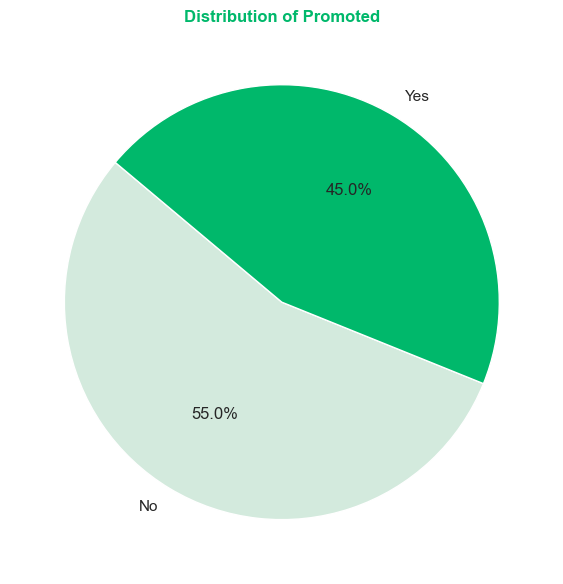

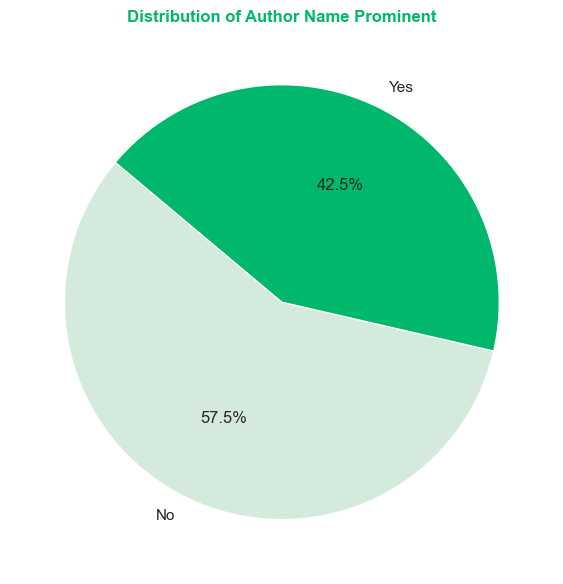

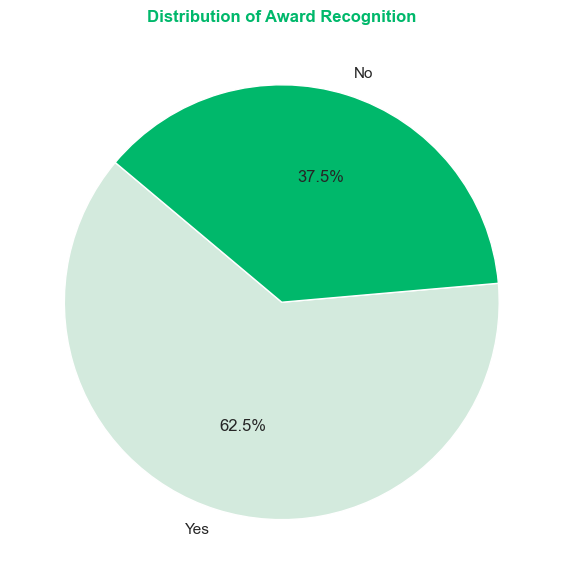

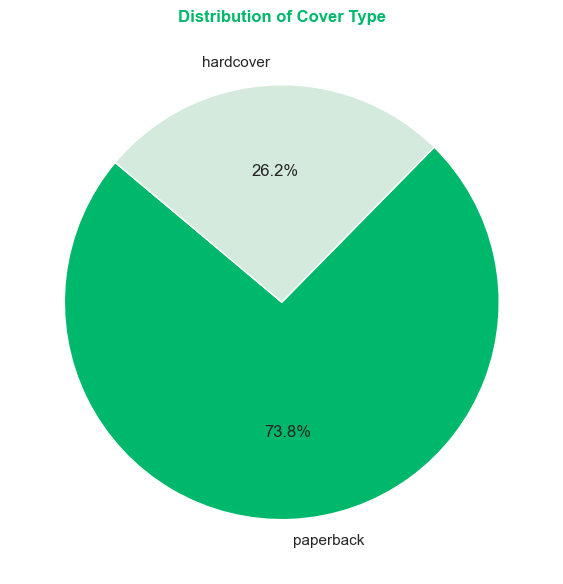

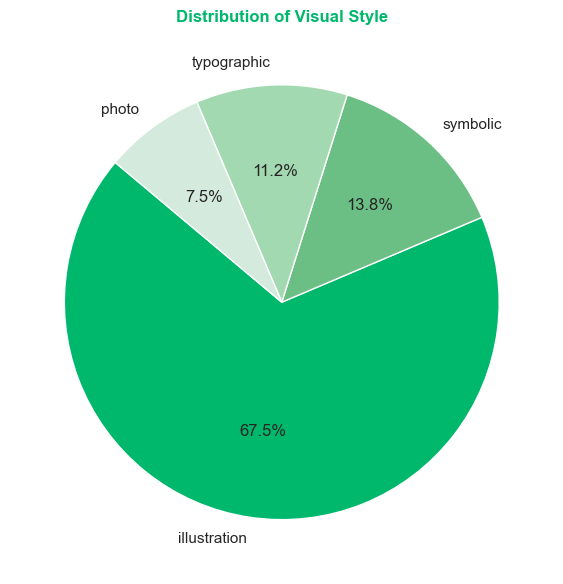

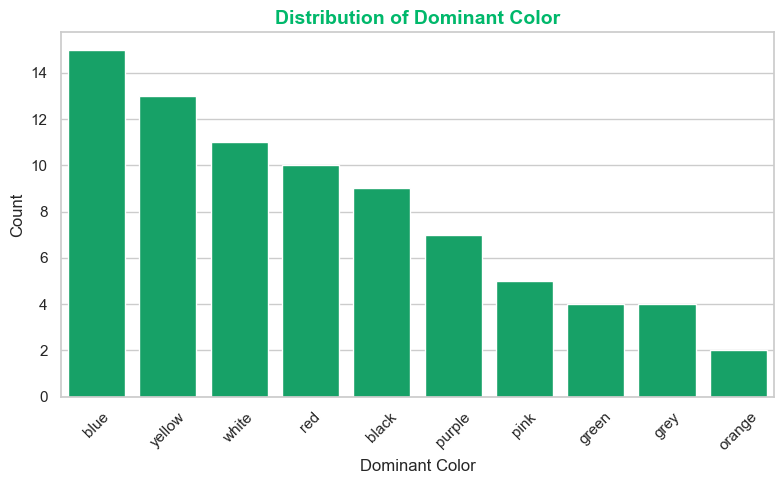

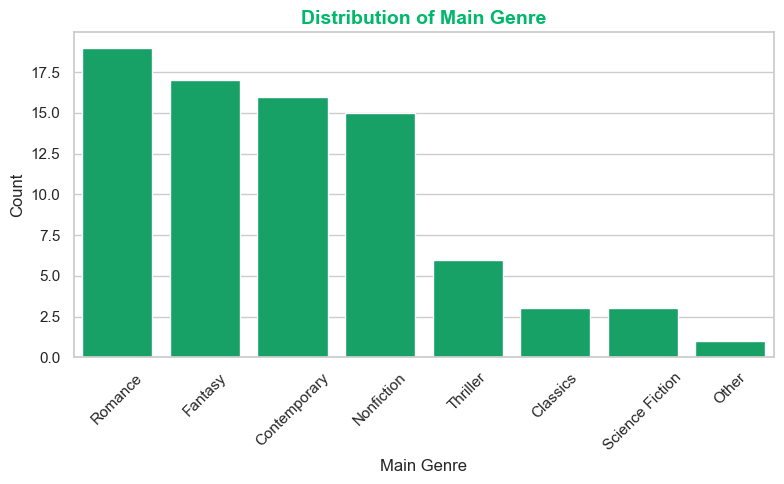

In [106]:
# Univariate Analysis for Categorical Variables

# Define binary variables (True/False) → pie chart
binary_vars = ['promoted', 'author_name_prominent', 'award_recognition']

# Define categorical variables with few values → pie chart
simple_cat_vars = ['cover_type', 'visual_style']

# Define categorical variables with many values → bar chart
bar_cat_vars = ['dominant_color', 'main_genre']

# Function to plot pie charts
def plot_pie_chart(series, title, labels_dict=None, colors=None):
    counts = series.value_counts()
    labels = [labels_dict.get(val, val) if labels_dict else val for val in counts.index]
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title, color='#00B86B', weight='bold')
    plt.tight_layout()
    plt.show()

# Function to plot sorted bar charts correctly
def plot_bar_chart(series, title, color='#00B86B'):
    counts = series.value_counts().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values, color=color, order=counts.index)  # enforce order
    plt.title(title, fontsize=14, color=color, weight='bold')
    plt.ylabel('Count')
    plt.xlabel(series.name.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot binary variables as pie charts
for var in binary_vars:
    plot_pie_chart(
        df[var],
        title=f'Distribution of {var.replace("_", " ").title()}',
        labels_dict={True: 'Yes', False: 'No'},
        colors=['#D3EADD', '#00B86B']
    )

# Plot simple categorical variables
for var in simple_cat_vars:
    if var == 'visual_style':
        pie_colors = ['#00B86B', '#6CBF84', '#A3D9B1', '#D3EADD']  # 4 shades of green
    else:
        pie_colors = ['#00B86B', '#D3EADD', '#A3D9B1']
    
    plot_pie_chart(
        df[var],
        title=f'Distribution of {var.replace("_", " ").title()}',
        colors=pie_colors
    )

# Plot bar charts for variables with many categories
for var in ['dominant_color', 'main_genre']:
    plot_bar_chart(
        df[var],
        title=f'Distribution of {var.replace("_", " ").title()}'
    )

## Insights from Categorical Variables
Here’s what we can observe from the categorical variables:

Promoted: 45% of the books were displayed face-out, while 55% were spine-out. This suggests that bookstore displays include both promoted titles and organically popular ones, highlighting that visibility can come from marketing, but also from existing demand.

Author Name Prominent: Around 43% of the covers highlight the author’s name prominently, which suggests that name recognition is a relevant factor, especially for returning readers or fans of bestselling authors.

Award Recognition: 62.5% of the books visibly featured a prize, nomination, or printed badge on the cover. This reflects a strong correlation between literary recognition and commercial positioning in physical bookstores.

Cover Type: A clear majority of books (74%) are paperback, likely due to their affordability and convenience. Hardcovers may be reserved for collectors or high-prestige titles.

Visual Style: Most book covers (67.5%) use illustration as their main visual element.  This trend indicates a clear preference for hand-drawn or stylized artwork over photographic covers, likely to evoke emotion or genre tone.

Dominant Color: Blue, yellow, and white are the most common dominant cover colors. These tones may convey calm, energy, or simplicity—visual qualities that stand out well on physical bookshelves.

Main Genre: The most represented genres are Romance, Fantasy, and Contemporary fiction, indicating a strong consumer preference for emotionally engaging, immersive, or relatable narratives. Less frequent genres like Classics or Science Fiction appear in smaller numbers, possibly due to their niche appeal.

##  Multivariate Analysis:

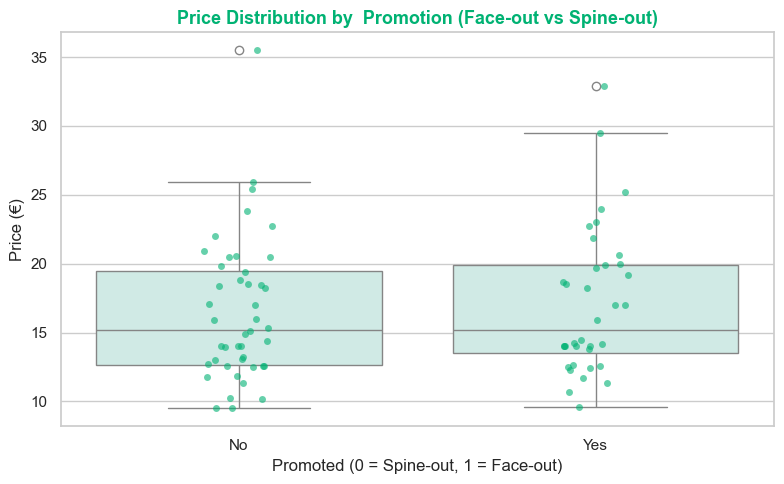

In [118]:
# Price Distribution by Promotion (Face-out vs Spine-out):
# Objective: Are promoted books more expensive?
# We want to compare the price distribution of books based on whether they were promoted in-store.

# Set green-friendly style
sns.set_style("whitegrid")
main_color = '#00B273'       # Darker green
secondary_color = '#cceee8'  # Light green

# Create boxplot + stripplot to show price distribution
plt.figure(figsize=(8, 5))

# Boxplot (background color only)
sns.boxplot(data=df, x='promoted', y='price', color=secondary_color)

# Stripplot for all books (both promoted = 0 and 1)
sns.stripplot(data=df, x='promoted', y='price',
              color=main_color, alpha=0.6, jitter=True)

# Customize title and axes
plt.title('Price Distribution by  Promotion (Face-out vs Spine-out)', fontsize=13, color=main_color)
plt.xlabel('Promoted (0 = Spine-out, 1 = Face-out)')
plt.ylabel('Price (€)')
plt.xticks([0, 1], ['No', 'Yes'])  # Rename x-axis categories

# Show the plot
plt.tight_layout()
plt.show()

Median Price:
The median price for both promoted (Yes) and non-promoted (No) books is almost the same — around €15, showing that promotion is not associated with higher average price.

IQR Comparison:
The IQRs (height of the boxes) are similar, but the promoted books (Yes) show slightly more spread, meaning a few promoted titles are more expensive.

Upper Whisker & Outliers:
Promoted books reach up to nearly €30+, slightly higher than non-promoted (~€25–26).
→ This suggests that very expensive books are a bit more likely to be promoted, possibly special editions or high-end formats.

Conclusion:
While the overall price distribution is similar for both groups, the plot shows that:

Promotion is not strictly tied to higher price.

Slightly more expensive books appear among the promoted ones.

Promotion likely depends on marketing strategy, popularity, or design, not just price.

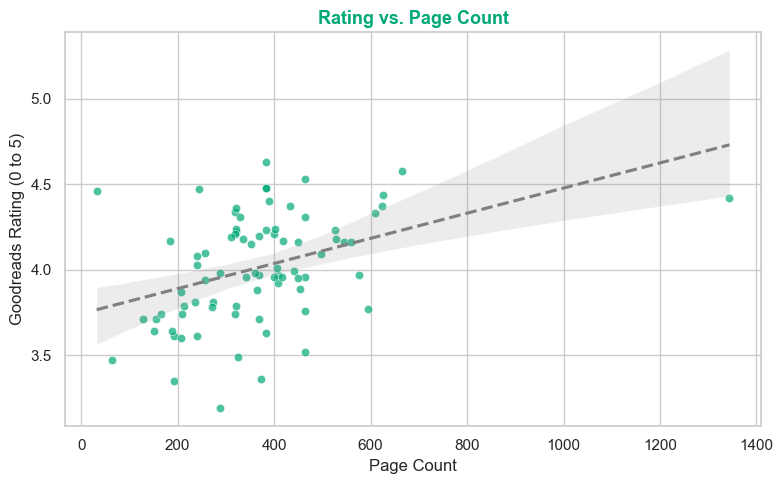

In [120]:
# Rating vs. Page Count
# Objective: Is there a relationship between book length and rating?
# We want to detect if longer books tend to receive higher or lower ratings.

# Set green-friendly style
sns.set_style("whitegrid")
scatter_color = '#00A878'  # Soft green tone

# Plot the scatterplot to show the relationship between page count and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='page_count', y='rating', color=scatter_color, alpha=0.7)

sns.regplot(data=df, x='page_count', y='rating', scatter=False, color='gray', line_kws={'linestyle':'dashed'})

# Add titles and axis labels
plt.title('Rating vs. Page Count', fontsize=13, color=scatter_color)
plt.xlabel('Page Count')
plt.ylabel('Goodreads Rating (0 to 5)')
plt.tight_layout()
plt.show()

Interpretation: Rating vs. Page Count
This scatterplot shows the relationship between the number of pages in a book and its Goodreads rating. The dashed regression line represents a linear trend, and the shaded area around it shows the confidence interval.

Conclusion:
There is a slight positive correlation between page count and rating.
In general, longer books tend to receive slightly higher ratings, but the relationship is very weak. This is evident from the shallow slope of the regression line and the wide dispersion of points.

This means that while longer books may be rated a bit higher on average, page count is not a strong predictor of rating. Other factors (such as genre, author reputation, or promotion) likely play a more significant role.

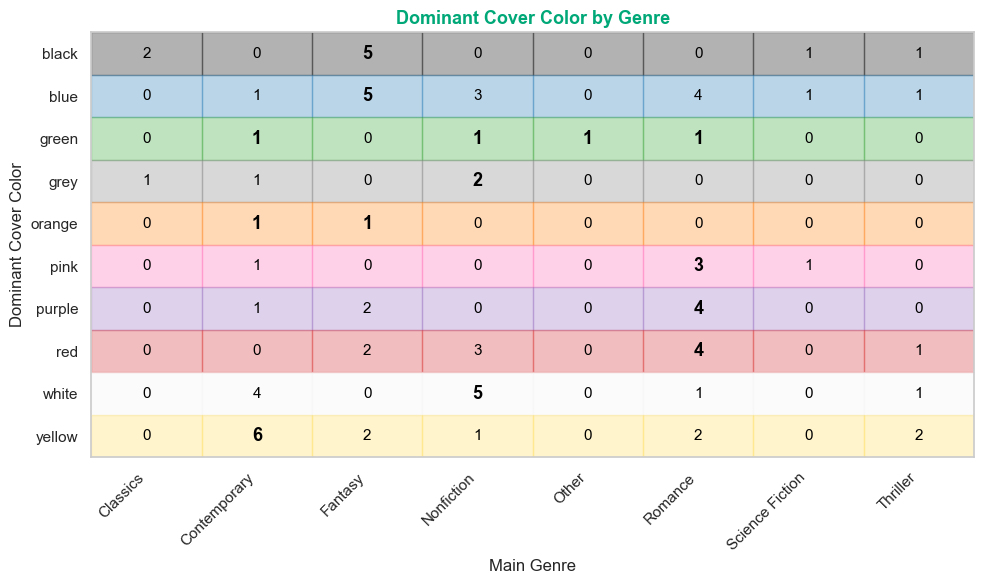

In [126]:
# Dominant Color vs Main Genre - Heatmap
# Objective: Identify if some cover colors are more frequent in specific genres
# Example: Is blue often used in Fantasy covers?

# Step 1: Create the crosstab (frequency table)
color_genre_ct = pd.crosstab(df['dominant_color'], df['main_genre'])

# Step 2: Color dictionary for dominant cover colors
color_map = {
    'black': '#000000',
    'blue': '#1f77b4',
    'green': '#2ca02c',
    'grey': '#7f7f7f',
    'orange': '#ff7f0e',
    'pink': '#ff69b4',
    'purple': '#9467bd',
    'red': '#d62728',
    'white': '#f5f5f5',
    'yellow': '#ffdd57'
}

# Step 3: Plot the colored background with value labels
fig, ax = plt.subplots(figsize=(10, 6))

# Convert the table to a NumPy array
data = color_genre_ct.values

# Loop through the matrix and draw each cell
for i in range(data.shape[0]):
    max_value = np.max(data[i])  # Get the max value in this row
    for j in range(data.shape[1]):
        val = data[i, j]
        # Background color based on the row (color name)
        bg_color = color_map.get(color_genre_ct.index[i], '#ffffff')
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=bg_color, alpha=0.3))
        
        # Highlight max values with bold and larger font
        if val == max_value and val > 0:
            ax.text(j + 0.5, i + 0.5, str(val), ha='center', va='center',
                    fontsize=13, fontweight='bold', color='black')
        else:
            ax.text(j + 0.5, i + 0.5, str(val), ha='center', va='center',
                    fontsize=11, color='black')

# Step 4: Configure axis ticks and labels
ax.set_xticks(np.arange(data.shape[1]) + 0.5)
ax.set_yticks(np.arange(data.shape[0]) + 0.5)
ax.set_xticklabels(color_genre_ct.columns, rotation=45, ha='right')
ax.set_yticklabels(color_genre_ct.index)

# Step 5: Aesthetic adjustments
ax.set_xlim(0, data.shape[1])
ax.set_ylim(0, data.shape[0])
ax.invert_yaxis()  # So first row is at the top
ax.set_title('Dominant Cover Color by Genre', fontsize=13, color='#00A878')
ax.set_xlabel('Main Genre')
ax.set_ylabel('Dominant Cover Color')
plt.grid(False)
plt.tight_layout()
plt.show()

Insights from Dominant Color vs. Genre Matrix

The matrix reveals several notable patterns in the relationship between cover color and book genre:

Fantasy books are frequently associated with black and blue covers, suggesting a strong stylistic convention in this genre.

Romance titles often use red, pink, or purple, reinforcing their connection to emotional and intimate themes.

Nonfiction books show a clear preference for white, which may reflect a clean and neutral design style.

Contemporary fiction tends to use yellow more than other genres, possibly to stand out visually.

These consistent patterns suggest that cover color is not randomly chosen, but rather aligned with genre expectations, helping readers quickly recognize the type of book.

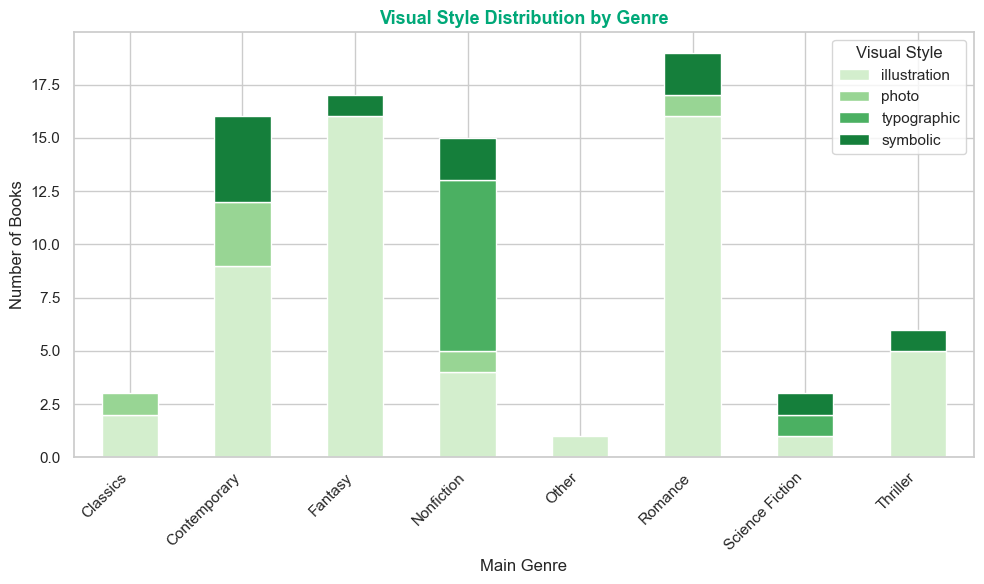

In [131]:
# Visual Style vs Main Genre - Stacked Bar Chart
# Objective: Analyze if certain genres (e.g. Fantasy or Romance) favor particular visual styles
# Question: Which visual styles dominate each genre? 

# Step 1: Prepare data for stacked bar chart
stacked_ct = pd.crosstab(df['main_genre'], df['visual_style'])

# Optional: Reorder visual styles if you want consistent stacking
style_order = ['illustration', 'photo', 'typographic', 'symbolic']
stacked_ct = stacked_ct[style_order]  # reorder columns

# Step 2: Set colors (4 shades of green)
stack_colors = sns.color_palette("Greens", n_colors=4)

# Step 3: Plot stacked bars
stacked_ct.plot(
    kind='bar',
    stacked=True,
    color=stack_colors,
    figsize=(10, 6)
)

# Step 4: Customize labels and appearance
plt.title('Visual Style Distribution by Genre', fontsize=13, color='#00A878')
plt.xlabel('Main Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visual Style')
plt.tight_layout()
plt.show()

Insights: Visual Style Preferences Across Genres

The stacked bar chart reveals strong genre-based preferences for certain visual styles on book covers:

Illustration dominates across nearly all genres, especially in Fantasy and Romance, where it's the overwhelming choice. This aligns with their tendency to evoke imagination and emotion.

Contemporary books show more diversity, incorporating photo, typographic, and symbolic elements more frequently than other genres.

Nonfiction stands out for its typographic and symbolic styles, likely due to their emphasis on clarity and authority.

Science Fiction and Thriller also feature a mix of styles, but tend to favor illustration and symbolic approaches.

This chart highlights how visual style is not randomly assigned—genres often follow specific design conventions to align with reader expectations and marketing strategies.

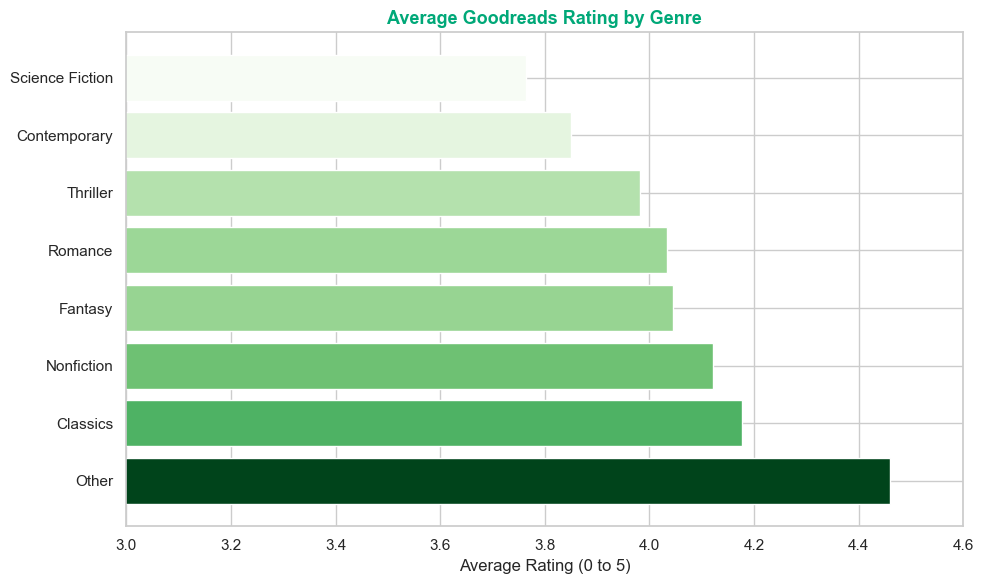

In [135]:
# Rating vs Main Genre - Do some genres tend to receive higher ratings?
# Objective: Identify if genres like Thriller or Romance have better average Goodreads ratings

# Step 1: Calculate average rating per genre
genre_rating_mean = df.groupby('main_genre', observed=True)['rating'].mean().sort_values(ascending=False)

# Step 2: Create a gradient color map (greens from high to low)
norm = plt.Normalize(genre_rating_mean.min(), genre_rating_mean.max())
colors = plt.cm.Greens(norm(genre_rating_mean.values))  # More intense green = higher rating

# Step 3: Plot bar chart with gradient coloring
plt.figure(figsize=(10, 6))
bars = plt.barh(genre_rating_mean.index, genre_rating_mean.values, color=colors)

# Step 4: Add labels
plt.title('Average Goodreads Rating by Genre', fontsize=13, color='#00A878')
plt.xlabel('Average Rating (0 to 5)')
plt.xlim(3.0, 4.6)
plt.tight_layout()

# Show plot
plt.show()

Conclusion: Average Goodreads Rating by Genre

The chart shows the average Goodreads ratings across different genres. Most genres cluster between 3.8 and 4.2, indicating generally favorable reception.

Classics and Nonfiction stand out with consistently high average ratings, suggesting strong reader appreciation.

Romance and Fantasy follow closely, also performing well, likely due to dedicated fan bases.

Contemporary and Science Fiction show the lowest average ratings, though still above 3.5.

The “Other” category has the highest rating, but this is based on a single children’s book (The Gruffalo), so it should be interpreted with caution.

This suggests that while genre does influence average reception, differences are relatively small—and individual book quality likely plays a greater role.

## Key Findings Summary
This exploratory data analysis explored the visual and commercial characteristics of a curated selection of 80 recent bestsellers and recommended titles, manually collected from physical bookstores.

The dataset includes variables on cover design (e.g., color, layout, style), book metadata (e.g., genre, author prominence), and external reception metrics such as Goodreads rating and page count.

Key insights from the EDA:

Data Quality and Structure: The dataset contains no missing values or duplicates. Text fields were cleaned, dates normalized, and variables were converted to appropriate types (categorical, boolean, datetime).

Genre Simplification: A new variable main_genre was created by grouping similar genre labels into 7 major categories. Romance and Fantasy were the most represented genres.

Univariate Distributions:

Most books had high Goodreads ratings, clustered around 4.0.

The average page count was around 400, with some longer outliers.

The dataset showed a strong presence of face-out promoted books and covers using illustration as their visual style.

Blue, black and white were the most dominant cover colors.

Visual Style Trends:

Fantasy and Romance favored illustrated covers, while Nonfiction leaned towards typographic or symbolic designs.

Most books had relatively short titles (under 5 words), often with prominent author names.

Multivariate Insights:

Promoted (face-out) books were slightly more expensive, but not dramatically so.

There was a weak positive correlation between page count and rating.

Clear color–genre associations emerged: Fantasy with blue/black, Romance with pink/purple, Nonfiction with white.

Classics and Nonfiction achieved the highest average Goodreads scores, while Contemporary fiction and Science Fiction trailed slightly behind.